# Lets take a look at how we can visualise data.
There's a lot of options for what to use and how to visualise your data. 
Here are some examples, but you are going to have to think about your data and what you want to get across when visualising. 

In [1]:
import pandas as pd
import pandas_datareader as pdr
import time

In [2]:
import yfinance as yf
import time

prices = []
for ticker in ['IBM', 'MSFT']:
    df = yf.download(ticker, start="2010-01-01")
    df['ticker'] = ticker
    prices.append(df)
    time.sleep(2)  # Sleep for 2 seconds to avoid overloading the server

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
prices[0].head(2)

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2010-01-04,125.411087,127.122368,125.095604,126.625237,75.353767,6438444,IBM
2010-01-05,125.889099,126.051628,124.378586,125.095604,74.443550,7156104,IBM


In [4]:
market_data = pd.merge_asof(prices[0][['Adj Close']], prices[1][['Adj Close']], left_index=True, right_index=True, suffixes=[str(' ' + prices[0]['ticker'][0]), str(' ' + prices[1]['ticker'][0])])

In [5]:
market_data

,Adj Close IBM,Adj Close MSFT
Date,,
2010-01-04,75.353767,23.347319
2010-01-05,74.443550,23.354862
2010-01-06,73.959938,23.211531
2010-01-07,73.703949,22.970140
2010-01-08,74.443550,23.128559
...,...,...
2024-10-02,219.729996,417.130005
2024-10-03,222.720001,416.540009
2024-10-04,226.000000,416.059998


## Lets plot

In [6]:
market_data.head(2)

,Adj Close IBM,Adj Close MSFT
Date,,
2010-01-04,75.353767,23.347319
2010-01-05,74.443550,23.354862


<Axes: xlabel='Date'>

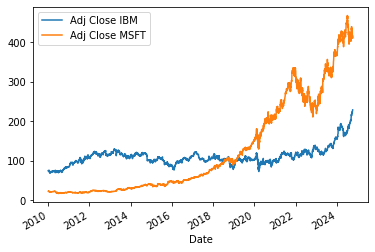

In [7]:
market_data.plot()

## If we want more control over the graph, we can use matplotlib
A lot of this can be done in the pandas version of matplotlib but we have more options if we use the full package. We also want to be able to use matplotlib if we are not working with pandas at some point

In [8]:
import matplotlib.pyplot as plt

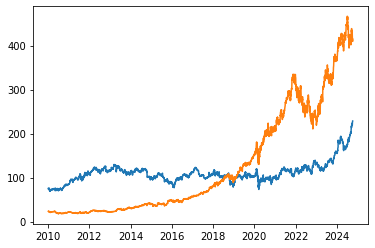

In [9]:
# If we do nothing we get the same graph. 
plt.plot(market_data)

Here are some examples of what we can do. Remember, there is a lot more that you can do to really make the graphs look great.

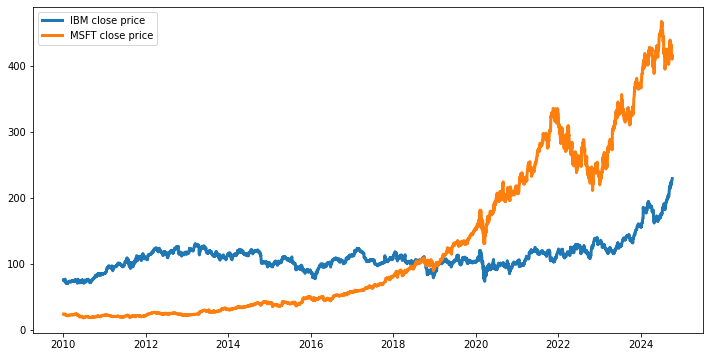

In [10]:
plt.figure(figsize=(12, 6)) # We can increase the size
plt.plot(market_data, linewidth=3) # When we plot the data we can also make the lines a little thicker 
plt.legend(['IBM close price', 'MSFT close price'])

In [11]:
# Lets see what we can do with the plot!
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots 

## Lets create one plot with two graphs in it.
This can be used for more graphs as well. Simply increase nrows and size as necessary. 

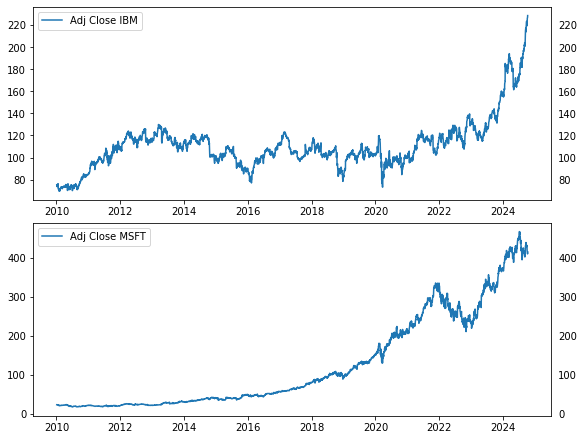

In [12]:
# We can split it up and give each ticker a graph 
figure, axis = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), constrained_layout=True)

# Lets use IBM in the first plit and set the legend
axis[0].plot(market_data['Adj Close IBM'])
axis[0].legend(['Adj Close IBM'])

axis[0].tick_params(labelright=True) # Here we set the label to be shown on the right as well, because in wide graphs it might be difficult to read the last stockprice all the way to the left

axis[1].plot(market_data['Adj Close MSFT'])
axis[1].legend(['Adj Close MSFT'])

axis[1].tick_params(labelright=True) # Here we set the label to be shown on the right as well, because in wide graphs it might be difficult to read the last stockprice all the way to the left

## We can use a tool called Seaborn aimed at statistical data visualisation to quickly make plots
https://seaborn.pydata.org/

<u>For your final report, look into these packages to visualise your data in the best way possible</u>

In [13]:
# Lets start with a correlation plot. Lets get data for some more tickers first.

In [14]:
import yfinance as yf
import time

prices = []
tickers = ['IBM', 'MSFT', 'TSLA', 'MG']  # List of tickers
for ticker in tickers:
    try:
        df = yf.download(ticker, start="2017-01-01")  # Download data starting from 2017
        df['ticker'] = ticker  # Add a 'ticker' column to identify the stock
        prices.append(df)  # Append the data to the prices list
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
    time.sleep(2)  # Sleep for 2 seconds to avoid overloading the server

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [15]:
prices[0].head(2)

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2017-01-03,159.655838,160.487579,158.709366,159.837479,112.199333,3069278,IBM
2017-01-04,160.391968,162.399612,160.000000,161.816437,113.588470,3536944,IBM


In [16]:
market_data = prices[0][['Adj Close']]
market_data = market_data.rename(columns={"Adj Close": str("Adj Close " + tickers[0])})
for i in range(1, len(prices)):
    # First rename Adj Close so we know which price column belongs to what company. 
    prices[i] = prices[i].rename(columns={"Adj Close": str("Adj Close " + tickers[i])})

    # Merge into main df
    market_data = pd.merge_asof(market_data, prices[i][[str('Adj Close ' + tickers[i])]], left_index=True, right_index=True)
    

In [17]:
market_data.head(3)

,Adj Close IBM,Adj Close MSFT,Adj Close TSLA,Adj Close MG
Date,,,,
2017-01-03,112.199333,56.828148,14.466000,25.709999
2017-01-04,113.588470,56.573879,15.132667,26.330000
2017-01-05,113.212639,56.573879,15.116667,24.230000


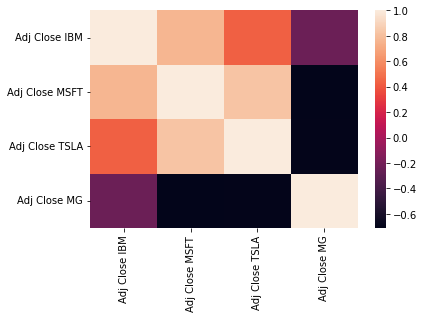

In [18]:
# Seaborn has a great tool for plotting a heatmap over correlations 
# and pandas has a function for getting correlation between columns.
import seaborn as sns

sns.heatmap(market_data.corr());

<Axes: xlabel='Date'>

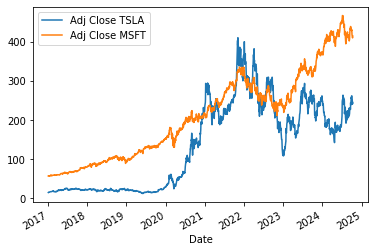

In [19]:
# Let's look at some quick examples. For simplicity, lets use pandas plot function 
# TSLA and MSFT seem to move rather similarly with a high correlation. 
market_data[['Adj Close TSLA', 'Adj Close MSFT']].plot()

<Axes: xlabel='Date'>

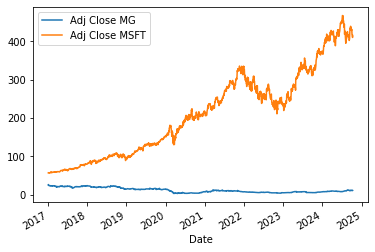

In [20]:
# MG and MSFT seem to move rather opposite with a low correlation. 
market_data[['Adj Close MG', 'Adj Close MSFT']].plot()

## Lets calculate returns for each ticker and plot the distrubution for two of them

In [21]:
import numpy as np
import seaborn as sns

In [22]:
# Lets create a copy of the df to prevent problems later
return_data = market_data.copy()

In [23]:
return_data.head()

,Adj Close IBM,Adj Close MSFT,Adj Close TSLA,Adj Close MG
Date,,,,
2017-01-03,112.199333,56.828148,14.466000,25.709999
2017-01-04,113.588470,56.573879,15.132667,26.330000
2017-01-05,113.212639,56.573879,15.116667,24.230000
2017-01-06,113.769691,57.064255,15.267333,24.100000
2017-01-09,112.508011,56.882633,15.418667,24.270000


In [24]:
return_data.columns

Index(['Adj Close IBM', 'Adj Close MSFT', 'Adj Close TSLA', 'Adj Close MG'], dtype='object')

In [25]:
for col in return_data.columns:
    print('return for', col)
    return_data[col + ' returns'] = np.log(return_data[col]) - np.log(return_data[col].shift(1))

return for Adj Close IBM
return for Adj Close MSFT
return for Adj Close TSLA
return for Adj Close MG


In [26]:
return_data.head(2)

,Adj Close IBM,Adj Close MSFT,Adj Close TSLA,Adj Close MG,Adj Close IBM returns,Adj Close MSFT returns,Adj Close TSLA returns,Adj Close MG returns
Date,,,,,,,,
2017-01-03,112.199333,56.828148,14.466000,25.709999,NaN,NaN,NaN,NaN
2017-01-04,113.588470,56.573879,15.132667,26.330000,0.012305,-0.004484,0.045055,0.023829


In [27]:
len(return_data)

1954

Quite a lot of data, lets reduce it to the last 400, the 400 most current data points.

In [28]:
return_data = return_data[-400:]

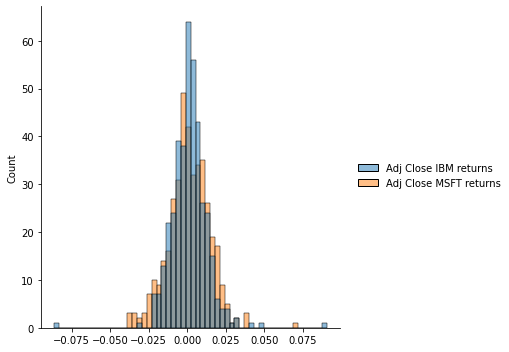

In [29]:
sns.displot(return_data[['Adj Close IBM returns', 'Adj Close MSFT returns']])

Not that easy to see... let us improve it a little. 

We are going to increase the size and add the label on the right to make the plot as easy as possible to interpret.

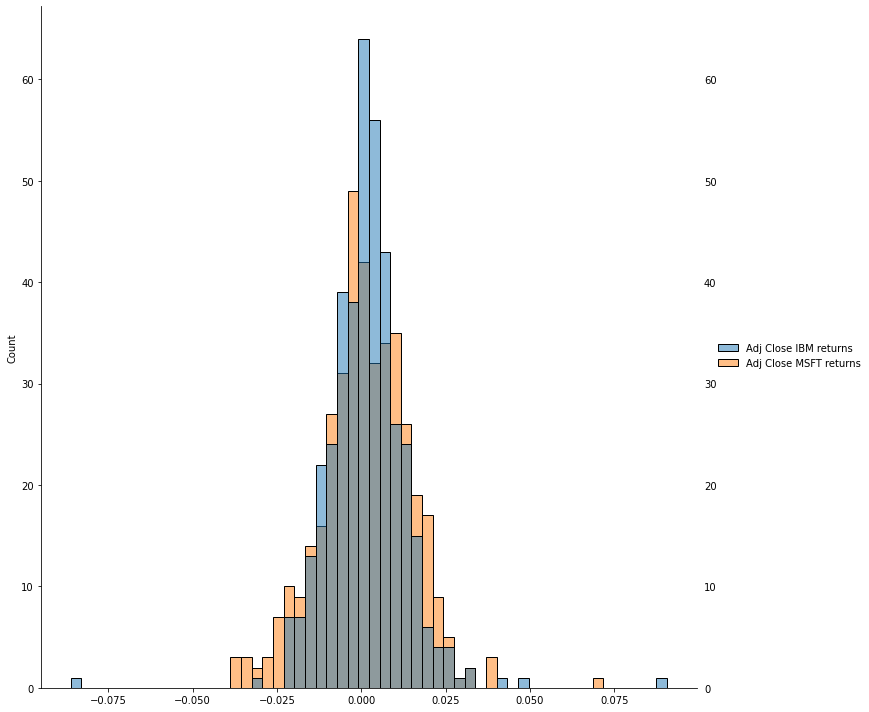

In [30]:
sns.displot(return_data[['Adj Close IBM returns', 'Adj Close MSFT returns']], height=10).tick_params(labelright=True)

Seems like IBM is a bit more centered around 0. Lets see if 

<Axes: xlabel='Date'>

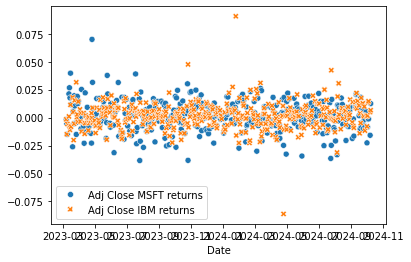

In [31]:
sns.scatterplot(return_data[['Adj Close MSFT returns', 'Adj Close IBM returns']])

<Axes: xlabel='Date'>

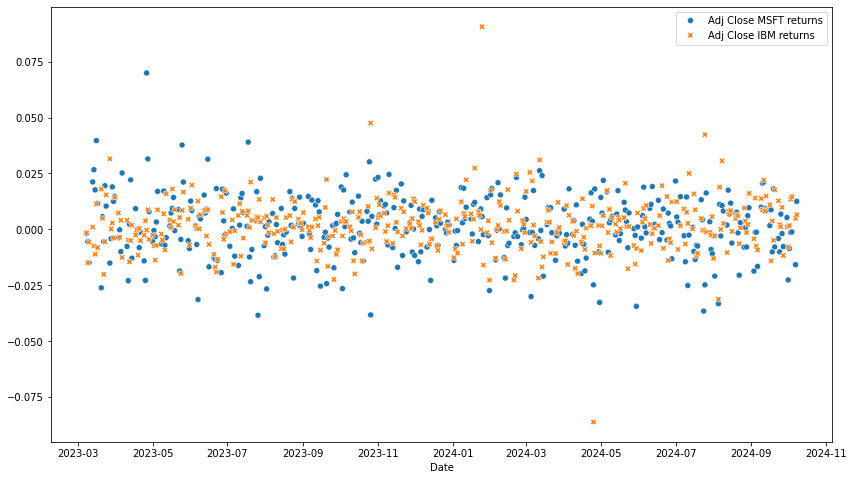

In [32]:
plt.figure(figsize=(14, 8))  # Setting width to 12 and height to 6 to make it wider
sns.scatterplot(return_data[['Adj Close MSFT returns', 'Adj Close IBM returns']])

IBM has larger extreme values and MSFT has slightly larger spread, as can be seen in both visualisations.

With this information you can do what you want. Maybe handle outliers or simply visualise the data. It is up tp you

In [33]:
help(sns.scatterplot)

Help on function scatterplot in module seaborn.relational:

scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between `x` and `y` can be shown for different subsets
    of the data using the `hue`, `size`, and `style` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    `hue` and `style` for the same variable) can be helpful for making
    graphics more accessible.
    
    See the :ref:`tutorial <relational_tutorial>` for more information.
